In [1]:
import pandas as pd
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = (12,6)

In [2]:
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

<Axes: xlabel='data'>

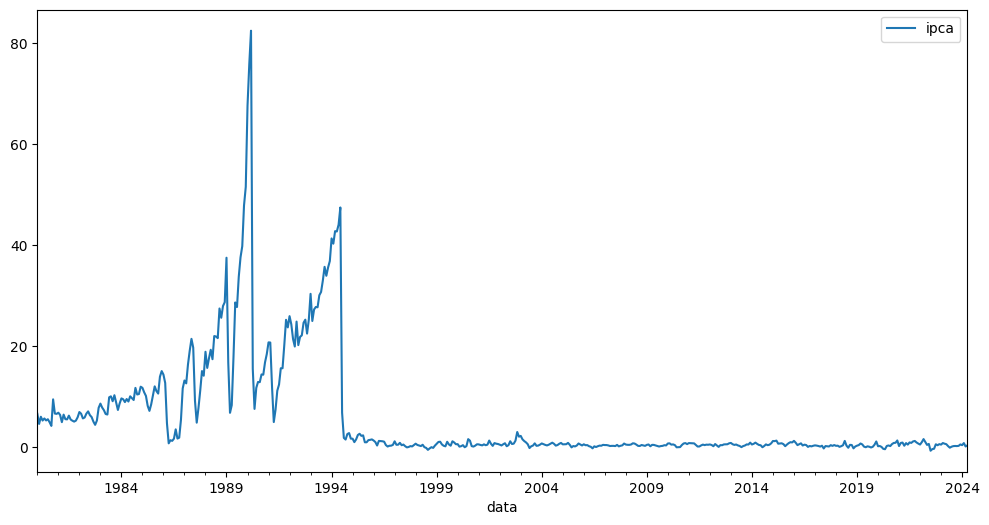

In [3]:
ipca = consulta_bc(433)
ipca.rename(columns={'valor': 'ipca'}, inplace=True)
ipca.plot()

<Axes: xlabel='data'>

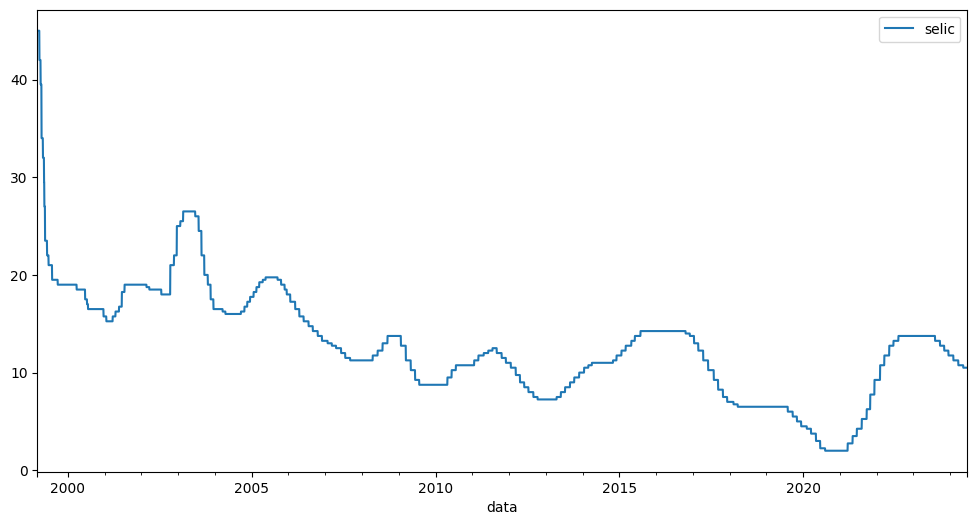

In [4]:
selic = consulta_bc(432)
selic.rename(columns={'valor': 'selic'}, inplace=True)
selic.plot()

<Axes: xlabel='data'>

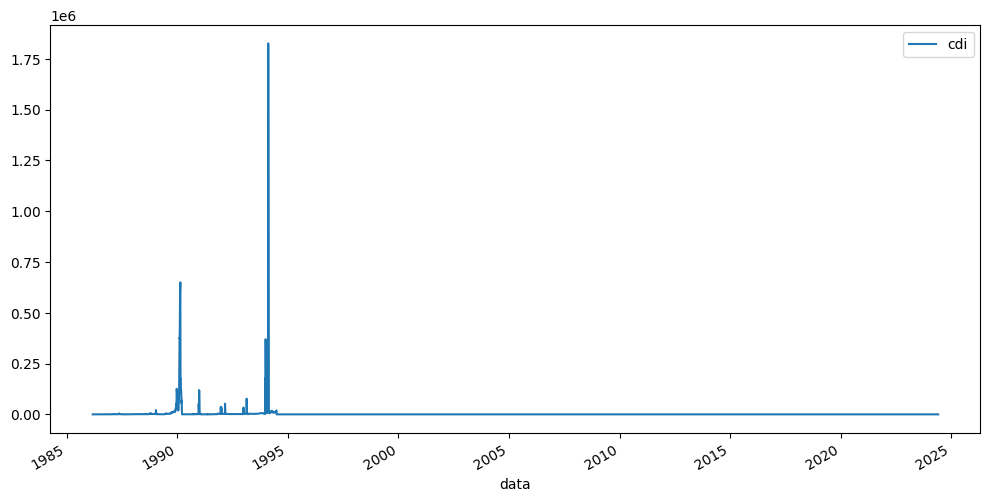

In [5]:
cdi = consulta_bc(4389)
cdi.rename(columns={'valor': 'cdi'}, inplace=True)
cdi.plot()

In [6]:
df_cdi_selic = pd.merge(cdi, selic, on="data", how="inner")
df = pd.merge(df_cdi_selic, ipca, on="data", how="inner")

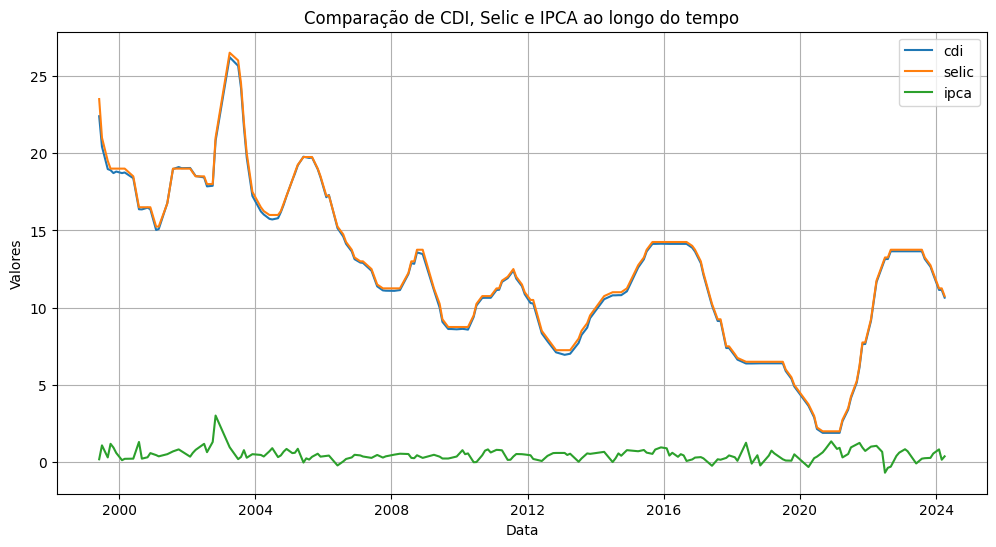

In [7]:
# Plotando as colunas do DataFrame
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

# Adicionando título e legendas
plt.title('Comparação de CDI, Selic e IPCA ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Valores')
plt.legend()
plt.grid(True)
plt.show()